In [1]:
import seaborn as sns

In [2]:
from matplotlib import pyplot as plt

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import os

In [6]:
df = pd.read_csv('e-shop clothing 2008',header=0)
df.head()

,Unnamed: 0,year,month,day,order,country,session.ID,page.1..main.category.,page.2..clothing.model.,colour,location,model.photography,price,price.2,page
0,1,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,3,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,4,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,5,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


In [7]:
df.shape

(165474, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Unnamed: 0               165474 non-null  int64 
 1   year                     165474 non-null  int64 
 2   month                    165474 non-null  int64 
 3   day                      165474 non-null  int64 
 4   order                    165474 non-null  int64 
 5   country                  165474 non-null  int64 
 6   session.ID               165474 non-null  int64 
 7   page.1..main.category.   165474 non-null  int64 
 8   page.2..clothing.model.  165474 non-null  object
 9   colour                   165474 non-null  int64 
 10  location                 165474 non-null  int64 
 11  model.photography        165474 non-null  int64 
 12  price                    165474 non-null  int64 
 13  price.2                  165474 non-null  int64 
 14  page                

In [9]:
df.describe

<bound method NDFrame.describe of         Unnamed: 0  year  month  day  order  country  session.ID  \
0                1  2008      4    1      1       29           1   
1                2  2008      4    1      2       29           1   
2                3  2008      4    1      3       29           1   
3                4  2008      4    1      4       29           1   
4                5  2008      4    1      5       29           1   
...            ...   ...    ...  ...    ...      ...         ...   
165469      165470  2008      8   13      1       29       24024   
165470      165471  2008      8   13      1        9       24025   
165471      165472  2008      8   13      1       34       24026   
165472      165473  2008      8   13      2       34       24026   
165473      165474  2008      8   13      3       34       24026   

        page.1..main.category. page.2..clothing.model.  colour  location  \
0                            1                     A13       1         5 

In [10]:
df['price'].describe()

count    165474.000000
mean         43.802507
std          12.548131
min          18.000000
25%          33.000000
50%          43.000000
75%          52.000000
max          82.000000
Name: price, dtype: float64

In [11]:
df['page.1..main.category.'].value_counts()

1    49742
4    38747
3    38577
2    38408
Name: page.1..main.category., dtype: int64

In [12]:
dfcorr=df[df.columns.drop('year')]
corr=dfcorr.corr()
corr

,Unnamed: 0,month,day,order,country,session.ID,page.1..main.category.,colour,location,model.photography,price,price.2,page
Unnamed: 0,1.000000,0.970174,0.163710,0.022110,0.065600,0.999948,0.016051,-0.031844,-0.016627,0.010590,0.011664,-0.012686,0.023419
month,0.970174,1.000000,-0.075098,0.026093,0.065502,0.970961,0.017557,-0.035279,-0.017712,0.011102,0.012700,-0.014658,0.020898
day,0.163710,-0.075098,1.000000,-0.021744,0.011551,0.161369,-0.001251,0.005313,0.000596,-0.000211,-0.002818,0.004254,0.011125
order,0.022110,0.026093,-0.021744,1.000000,-0.064709,0.021829,0.151693,0.046427,0.014854,0.061820,-0.064779,0.000772,0.204106
country,0.065600,0.065502,0.011551,-0.064709,1.000000,0.065869,0.132817,0.009789,-0.009072,0.028725,-0.045345,-0.017536,0.026695
session.ID,0.999948,0.970961,0.161369,0.021829,0.065869,1.000000,0.016123,-0.032034,-0.016721,0.010585,0.011669,-0.012742,0.023254
page.1..main.category.,0.016051,0.017557,-0.001251,0.151693,0.132817,0.016123,1.000000,0.230577,0.015939,0.213113,-0.364791,-0.137944,0.347992
colour,-0.031844,-0.035279,0.005313,0.046427,0.009789,-0.032034,0.230577,1.000000,0.042062,0.074755,-0.091159,-0.080147,0.249322
location,-0.016627,-0.017712,0.000596,0.014854,-0.009072,-0.016721,0.015939,0.042062,1.000000,0.067678,-0.084653,0.073187,-0.091865
model.photography,0.010590,0.011102,-0.000211,0.061820,0.028725,0.010585,0.213113,0.074755,0.067678,1.000000,-0.212395,0.072944,0.258315


In [13]:
pd.isnull(df).sum()

Unnamed: 0                 0
year                       0
month                      0
day                        0
order                      0
country                    0
session.ID                 0
page.1..main.category.     0
page.2..clothing.model.    0
colour                     0
location                   0
model.photography          0
price                      0
price.2                    0
page                       0
dtype: int64

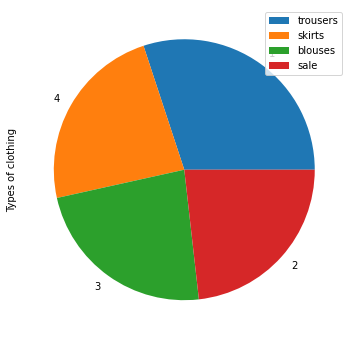

In [14]:
piechart=df['page.1..main.category.'].value_counts().plot(kind='pie',figsize=(6,6))
piechart.set_ylabel('Types of clothing')
plt.legend(["trousers","skirts","blouses","sale"])

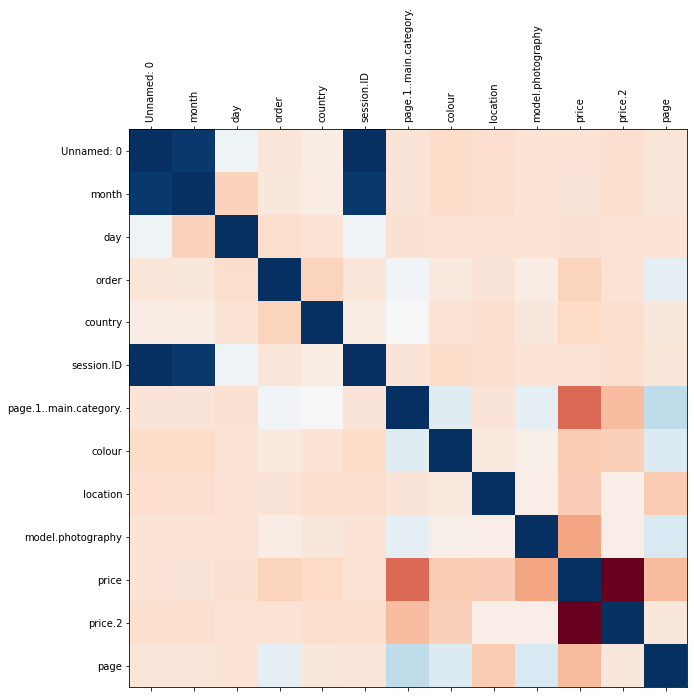

In [15]:
fig=plt.figure(figsize=(10,10))
plt.matshow(corr,cmap='RdBu',fignum=fig.number)
plt.xticks(range(len(corr.columns)),corr.columns,rotation='vertical');
plt.yticks(range(len(corr.columns)),corr.columns);

<function matplotlib.pyplot.show(close=None, block=None)>

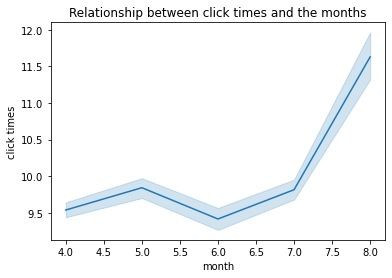

In [16]:
sns.lineplot(x="month", y="order",data=df)
plt.title("Relationship between click times and the months")
plt.xlabel("month")
plt.ylabel("click times")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

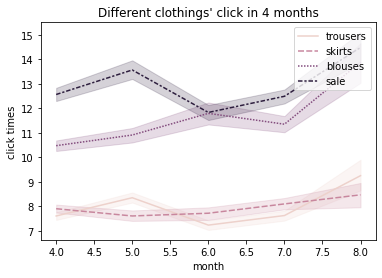

In [17]:
sns.lineplot(x="month", y="order",data=df,hue="page.1..main.category.",style="page.1..main.category.")
plt.title("Different clothings' click in 4 months")
plt.xlabel("month")
plt.ylabel("click times")
plt.legend(["trousers","skirts","blouses","sale"],loc='upper right')
plt.show

D:\Macine learning\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


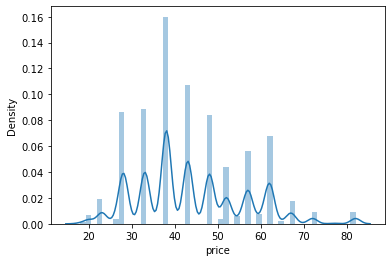

In [19]:
sns.distplot(df['price'])
plt.show()

In [20]:
from scipy import stats
density=stats.kde.gaussian_kde(df["price"])
density

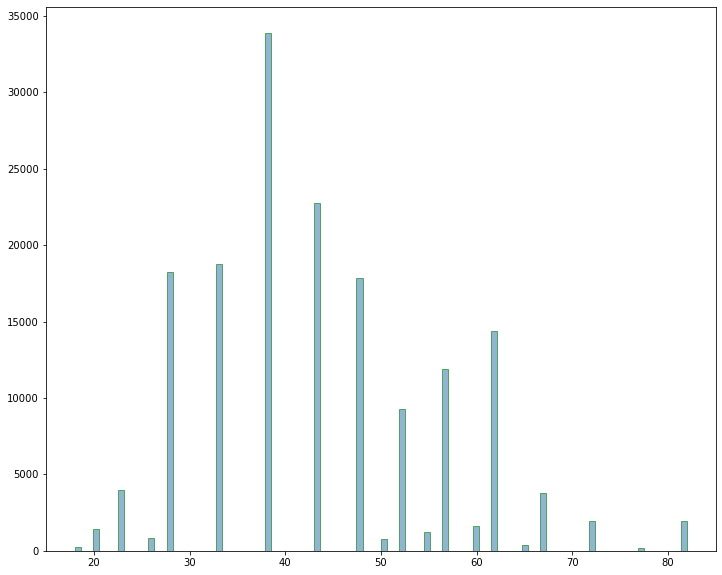

In [16]:
plt.subplots(figsize=(12,10))
plt.hist(df["price"],bins=100,alpha=0.6,
        histtype='bar',color='steelblue',
        edgecolor='green')
plt.xlim(xmin=15,xmax=85)
plt.show()

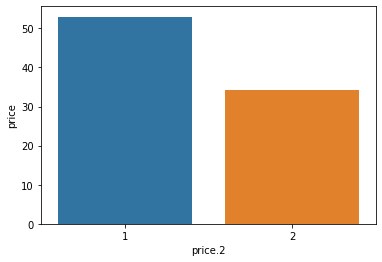

In [17]:
sns.barplot(x="price.2",y="price",data=df)
plt.show()

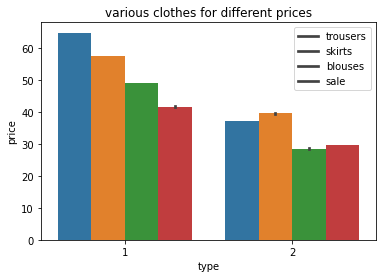

In [29]:
sns.barplot(x="price.2",y="price",data=df,hue="page.1..main.category.")
plt.title("various clothes for different prices")
plt.xlabel("type")
plt.ylabel("price")
plt.legend(["trousers","skirts","blouses","sale",loc='upper right'])
plt.show()

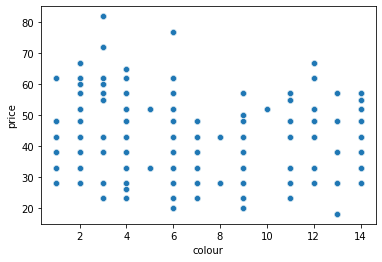

In [19]:
sns.scatterplot(x="colour",y="price",data=df)
plt.show()

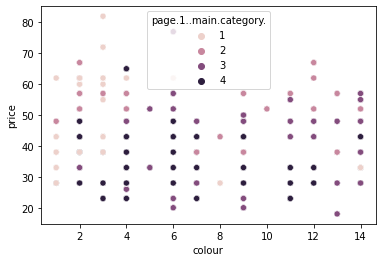

In [31]:
sns.scatterplot(x="colour",y="price",data=df,hue="page.1..main.category.")

plt.show()

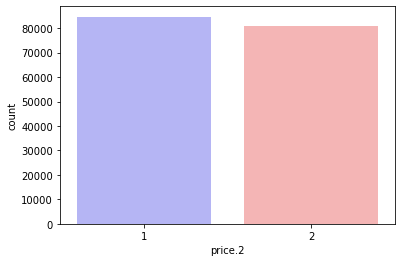

In [21]:
sns.countplot(x="price.2", data=df, palette="bwr")
plt.show()

D:\Macine learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


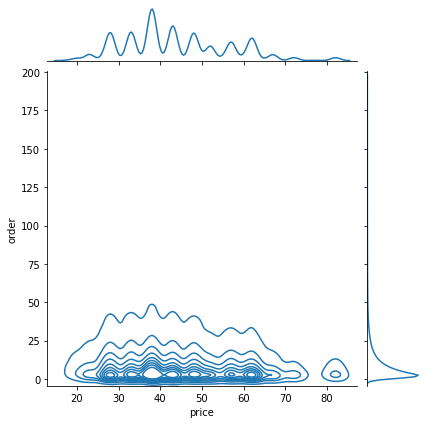

In [22]:
sns.jointplot(df['price'],df['order'],kind="kde")

D:\Macine learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price.2', ylabel='count'>

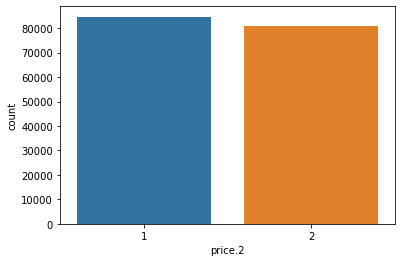

In [23]:
sns.countplot(df['price.2'])

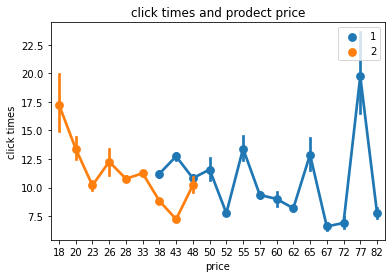

In [35]:
sns.pointplot(x="price",y="order",hue="price.2",data=df)
plt.title("click times and prodect price")
plt.xlabel("price")
plt.ylabel("click times")
plt.legend(loc='upper right')
plt.show()

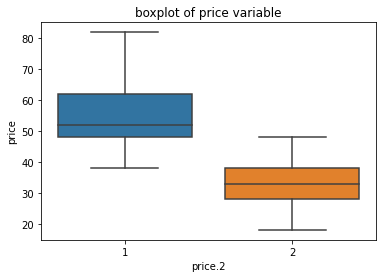

In [36]:
sns.boxplot(x="price.2",y="price",data=df)
plt.title("boxplot of price variable")
plt.show()